In [1]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [3]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [4]:
#Show the result

fin_result=time_evo(1000,0.5,1/14)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

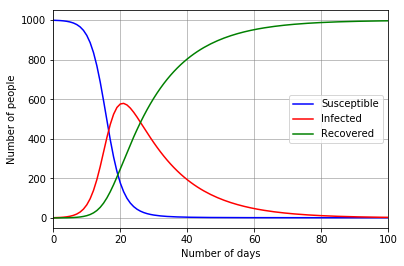

In [5]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [6]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [7]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 4101699
Total deaths: 282709
Total recovered: 1408980
Based on the WHO data, the death rate is between 6.9 % and 16.7 % of the confirmed case


In [8]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

4.879856139447246
2.8570643188887574


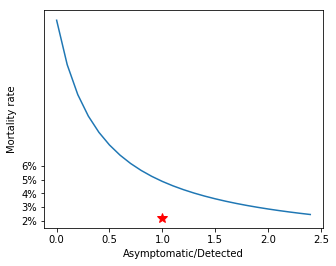

In [9]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
#plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [10]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [11]:
######## INPUT PARAMETERS ########
country='Italy'
t0=pd.to_datetime('2020-01-22')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Italy 219070
Total deaths Italy 30560
Total recovered  Italy 105186
Based on the WHO data, the death rate in Italy is between 13.9 % and 22.5 % of the total confirmed case


/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


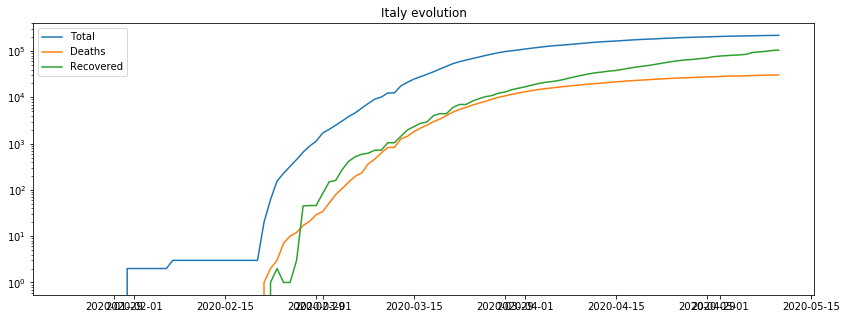

In [12]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
#plt.savefig('country_plot.png',dpi=300)
plt.show()

In [13]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

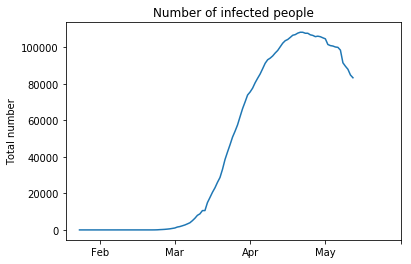

In [14]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
#plt.savefig('activegermany.png',dpi=300)
plt.show()

In [15]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-01-22')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [16]:
print(whichcountry('Italy')[0])#confirmed last day
print(whichcountry('Italy')[2])#recovered last day

[     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     19     59    150    221    311    438    593    821   1053   1577
   1835   2263   2706   3296   3916   5061   6387   7985   8794  10590
  10590  14955  17750  20603  23073  26062  28710  33190  38549  42681
  46638  50826  54030  57521  62013  66414  70065  73880  75528  77635
  80572  83049  85388  88274  91246  93187  94067  95262  96877  98273
 100269 102253 103616 104291 105418 106607 106962 107771 108257 108237
 107709 107699 106848 106527 105847 106103 105813 105205 104657 101551
 100943 100704 100179  99980  98467  91528  89624  87961  84842  83324]
105186


In [17]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,4402
1,Albania,868
2,Algeria,5723
3,Andorra,755
4,Angola,45
5,Antigua and Barbuda,25
6,Argentina,6034
7,Armenia,3313
8,Australia,107
9,Australia,3053


In [18]:
countries_list=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']

In [19]:
df_active=pd.DataFrame(whichcountry(countries_list[0])[0])
df_active.columns=[countries_list[0]]
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(df_active[-1:])

            Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
2020-05-10      187     1943     1262         837    16436    30783   

            Bosnia and Herzegovina  Bulgaria  Cyprus  Croatia  ...  Romania  \
2020-05-10                     904      1430     481      333  ...     7350   

            Serbia  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  \
2020-05-10    7085       490      1099  61563   18126         1872   42180   

            Ukraine  United Kingdom  
2020-05-10    11781          187517  

[1 rows x 47 columns]


In [20]:
print(df_active['Germany'])

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        1
2020-01-28        4
2020-01-29        4
2020-01-30        4
2020-01-31        5
2020-02-01        8
2020-02-02       10
2020-02-03       12
2020-02-04       12
2020-02-05       12
2020-02-06       12
2020-02-07       13
2020-02-08       13
2020-02-09       14
2020-02-10       14
2020-02-11       16
2020-02-12       16
2020-02-13       15
2020-02-14       15
2020-02-15       15
2020-02-16       15
2020-02-17       15
2020-02-18        4
2020-02-19        4
2020-02-20        4
              ...  
2020-04-11    64772
2020-04-12    64532
2020-04-13    62578
2020-04-14    59865
2020-04-15    58349
2020-04-16    56646
2020-04-17    53931
2020-04-18    53483
2020-04-19    52598
2020-04-20    50703
2020-04-21    48058
2020-04-22    45969
2020-04-23    44254
2020-04-24    39439
2020-04-25    40836
2020-04-26    39794
2020-04-27    38132
2020-04-28    36198
2020-04-29    34672


In [21]:
df_active.to_csv('active_infected',index=True)

In [22]:
data = pd.read_csv('active_infected')
#print(data['Italy'])

In [23]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]


In [24]:
n_countries = len(countries_list)

In [25]:
today=len(xdata)

In [26]:
array_country=whichcountry('Italy')[0]

def minimizer(R0,t1=today-5,t2=today):
    array_country_bis=array_country
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,1/14*R0,1/14,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [27]:
#definition of the ideal r0

xgrid=np.arange(0.01,1.3,0.01)
ygrid=minimizer_vec(xgrid)#calcola per la prima
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [28]:
#time(minimizer_vec(xgrid))

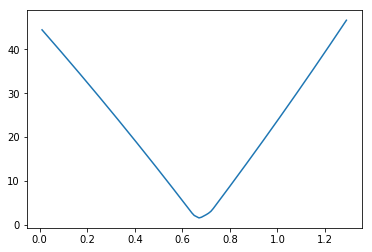

0.67


In [29]:
plt.plot(xgrid,ygrid)
plt.show()
print(r0_ideal)

In [30]:
time_window=5

def minimizer_gen(t1,t2,xgrid=np.arange(0.1,5,0.01)):

    ygrid=minimizer_vec(xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [31]:
print(whichcountry(countries_list[0])[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187]


In [32]:
r0_time=[]
scangrid=np.linspace(0,5,100)
array_country=whichcountry(countries_list[0])[0] #inizializzo

for name in range(0, len(countries_list)):
    print(countries_list[name],array_country)
    
    for i in range(0,today-(time_window-1)):
        min_val=minimizer_gen(i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+5,200)
        print(i,min_val)
        
    array_country=whichcountry(countries_list[name+1])[0]

Albania [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0


/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 5.0
48 5.58
49 6.49
50 3.93
51 2.83
52 2.52
53 2.53
54 2.01
55 2.01
56 2.22
57 2.47
58 2.63
59 2.91
60 2.78
61 2.42
62 2.42
63 2.09
64 1.39
65 1.64
66 1.5
67 1.27
68 1.45
69 1.56
70 1.88
71 1.97
72 1.89
73 1.32
74 0.76
75 0.55
76 0.73
77 0.72
78 0.75
79 0.87
80 0.97
81 1.17
82 1.18
83 1.4
84 1.06
85 1.19
86 1.03
87 1.36
88 1.5
89 1.37
90 1.38
91 1.47
92 1.46
93 1.49
94 1.11
95 0.89
96 0.77
97 0.55
98 0.33
99 0.29
100 0.35
101 0.59
102 0.56
103 0.5
104 0.58
105 0.76
Armenia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1    1    1
    1    1    1    1    1    1    1    1 

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 5.0
40 10.0
41 10.25
42 8.81
43 7.36
44 4.66
45 3.16
46 3.03
47 2.82
48 4.28
49 4.66
50 5.87
51 3.93
52 3.72
53 3.37
54 3.36
55 3.44
56 3.65
57 3.48
58 2.81
59 2.86
60 2.49
61 3.09
62 3.58
63 3.66
64 3.18
65 3.21
66 2.35
67 1.96
68 1.85
69 1.96
70 2.03
71 1.94
72 1.81
73 1.61
74 1.63
75 1.6
76 1.56
77 1.62
78 1.53
79 1.44
80 1.49
81 1.47
82 1.5
83 1.63
84 1.3
85 1.36
86 1.41
87 1.42
88 1.39
89 1.28
90 1.26
91 1.29
92 1.3
93 1.2
94 1.15
95 1.14
96 1.11
97 1.07
98 1.07
99 1.07
100 1.07
101 1.07
102 1.04
103 1.03
104 1.03
105 1.12
Bosnia and Herzegovina [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    2    2    3    3    3    5    7   11   13   18   24   25   24
   36   61   87   90  123  133  161  

39 4.56
40 7.11
41 5.72
42 5.12
43 6.56
44 4.12
45 9.12
46 11.0
47 8.84
48 6.19
49 3.94
50 2.61
51 1.68
52 1.95
53 2.13
54 2.26
55 2.23
56 2.11
57 1.97
58 1.75
59 1.76
60 1.83
61 2.02
62 2.08
63 2.06
64 2.06
65 2.02
66 2.05
67 0.78
68 0.38
69 0.38
70 1.97
71 2.21
72 2.1
73 2.07
74 1.95
75 1.68
76 1.51
77 1.24
78 1.13
79 0.92
80 0.86
81 0.8
82 0.61
83 0.54
84 0.19
85 0.05
86 0.15
87 0.23
88 0.21
89 0.03
90 0.35
91 0.83
92 1.03
93 1.06
94 0.85
95 0.71
96 0.69
97 0.6
98 0.73
99 0.78
100 0.84
101 0.94
102 0.72
103 0.46
104 0.38
105 0.41
Estonia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    1    1    1    1    1    2
    2    3   10   10   10   10   12   16   16   79  115  170  204  224
  257  266  282  305  324  350  362  395  529  563  624  656  692  715
  741  802  901  967 1020 1027 1059 1089 1100 1141 1187 1186 1202 1227
 1248 1265 1276 1312 1324 1

15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 5.0
36 3.97
37 2.97
38 3.84
39 2.18
40 2.78
41 7.58
42 8.6
43 4.03
44 3.36
45 4.07
46 2.05
47 3.05
48 4.13
49 5.09
50 6.24
51 3.39
52 3.54
53 1.85
54 2.34
55 2.03
56 2.05
57 2.73
58 2.37
59 2.56
60 2.2
61 2.03
62 2.19
63 2.17
64 2.05
65 2.09
66 2.03
67 1.98
68 2.14
69 1.9
70 1.7
71 1.41
72 1.03
73 0.88
74 0.86
75 1.59
76 1.52
77 1.51
78 1.41
79 1.35
80 1.21
81 1.19
82 1.15
83 1.11
84 1.07
85 1.07
86 1.01
87 0.72
88 0.63
89 0.74
90 1.21
91 1.22
92 1.13
93 1.11
94 1.11
95 0.0
96 0.0
97 0.0
98 0.0
99 1.13
100 1.08
101 1.07
102 1.13
103 1.17
104 1.21
105 1.15
Hungary [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    2    2    2    4    7    9    9   13   13   19   29   30   37   47
   

5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 5.0
52 7.14
53 6.59
54 6.35
55 2.62
56 2.91
57 2.23
58 2.58
59 2.44
60 2.39
61 3.6
62 4.32
63 5.15
64 5.15
65 4.03
66 2.9
67 2.34
68 2.58
69 2.51
70 2.49
71 2.33
72 2.54
73 2.24
74 2.0
75 1.69
76 1.68
77 1.75
78 1.76
79 2.11
80 2.18
81 1.98
82 1.79
83 1.64
84 1.74
85 1.69
86 1.75
87 1.93
88 2.12
89 2.0
90 1.97
91 1.86
92 1.76
93 1.56
94 1.62
95 1.73
96 1.83
97 1.85
98 2.0
99 1.51
100 1.34
101 1.08
102 1.25
103 1.32
104 1.33
105 1.24
Kyrgyzstan [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   3 

63 3.04
64 2.71
65 2.87
66 2.77
67 2.97
68 3.4
69 3.55
70 3.57
71 3.27
72 3.28
73 2.58
74 2.36
75 2.37
76 2.37
77 2.26
78 2.12
79 1.9
80 1.8
81 1.71
82 1.79
83 1.4
84 1.22
85 1.25
86 1.19
87 1.31
88 1.4
89 1.38
90 1.54
91 1.41
92 1.45
93 1.43
94 1.23
95 1.25
96 1.26
97 1.04
98 1.09
99 1.04
100 1.12
101 1.14
102 1.14
103 1.05
104 1.12
105 1.17
Monaco [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1
  1  1  2  2  2  2  7  7  7  7 11 11 22 22 22 30 32 41 41 44 47 49 52 57
 60 62 69 72 74 76 78 84 86 86 86 86 78 78 71 69 69 68 65 65 55 49 48 48
 49 41 33 27 18 13 13 13 10  9  9  9 10 10]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 1.01
39 1.0
40 0.99
41 0.99
42 0.99
43 0.99
44 0.99
4

6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 5.0
41 9.7
42 7.46
43 6.7
44 5.0
45 4.37
46 3.34
47 5.57
48 5.68
49 5.85
50 7.58
51 6.07
52 5.56
53 5.09
54 4.92
55 4.69
56 5.89
57 4.38
58 4.15
59 3.95
60 3.73
61 3.47
62 3.75
63 3.43
64 3.43
65 2.97
66 2.64
67 2.46
68 2.59
69 2.29
70 2.12
71 2.0
72 1.76
73 1.73
74 1.66
75 1.77
76 1.87
77 1.86
78 1.79
79 1.4
80 1.38
81 1.38
82 1.38
83 1.38
84 1.35
85 1.31
86 1.4
87 1.32
88 1.27
89 1.2
90 1.25
91 1.26
92 1.29
93 1.23
94 1.16
95 1.11
96 1.17
97 1.09
98 1.1
99 1.01
100 1.03
101 1.09
102 1.1
103 1.13
104 1.14
105 1.14
Romania [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    1    3    3    3    3    3
    3    5    8    6 

5 0.0
6 0.0
7 0.0
8 0.0
9 1.01
10 1.0
11 0.99
12 0.99
13 0.99
14 0.99
15 0.99
16 0.99
17 0.99
18 0.99
19 0.99
20 0.99
21 0.99
22 0.99
23 0.99
24 0.99
25 0.99
26 0.99
27 0.99
28 0.99
29 0.99
30 0.99
31 0.99
32 1.02
33 6.02
34 10.08
35 8.11
36 3.69
37 4.85
38 3.61
39 5.28
40 7.65
41 8.14
42 8.12
43 4.42
44 5.4
45 4.7
46 4.78
47 5.16
48 4.65
49 3.54
50 3.48
51 2.39
52 1.97
53 2.03
54 2.19
55 2.31
56 2.42
57 2.39
58 2.15
59 2.23
60 2.18
61 2.38
62 2.37
63 2.33
64 2.21
65 2.28
66 2.12
67 2.18
68 2.27
69 2.19
70 2.13
71 1.86
72 1.76
73 1.77
74 1.91
75 1.91
76 1.94
77 1.78
78 1.6
79 1.63
80 1.57
81 1.55
82 1.51
83 1.54
84 1.61
85 1.66
86 1.54
87 1.48
88 1.43
89 1.45
90 1.49
91 1.47
92 1.37
93 1.41
94 1.39
95 1.41
96 1.51
97 1.44
98 1.39
99 1.28
100 0.66
101 0.46
102 0.55
103 1.26
104 1.26
105 1.23
Switzerland [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0    

IndexError: list index out of range

In [33]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
#print(r0_countries0)

In [34]:
r0_countries_tot=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-26'))

r0_countries_tot.columns   = ['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(r0_countries_tot['Germany'].tail())

2020-05-06    0.27
2020-05-07    0.00
2020-05-08    0.00
2020-05-09    0.28
2020-05-10    0.82
Name: Germany, dtype: float64


In [35]:
r0_countries_tot.to_csv('r0_countries.csv',index=True)

In [ ]:
r0_countries_imp = pd.read_csv('r0_countries_no_ita.csv')

In [ ]:
print(r0_countries_imp['Germany'].shape)

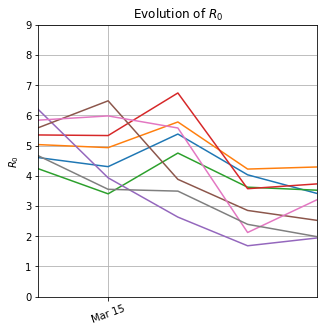

In [166]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['United Kingdom'])
plt.plot(r0_countries_imp['Germany'])
plt.plot(r0_countries_imp['France'])
plt.plot(r0_countries_imp['Spain'])
plt.plot(r0_countries_imp['Denmark'])
plt.plot(r0_countries_imp['Albania'])
plt.plot(r0_countries_imp['Belarus'])
plt.plot(r0_countries_imp['Sweden'])
plt.xticks(np.arange(0-(time_window-5),93,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19', 'Apr 26'],rotation=20)
plt.xlim(48,52)#today)
plt.ylabel('$R_0$')
plt.ylim(0,9)
plt.grid()
plt.title('Evolution of $R_0$')
#plt.savefig('output_countries/r0-evo_Italy.png',dpi=300)
plt.show()

In [149]:
r0_file_cut_df=pd.DataFrame(r0_countries_imp.iloc[33:len(r0_countries_imp),:])
#index=range(len(r0_countries_imp)-30))
print(r0_file_cut_df.shape)
#print(r0_file_cut_df)

(61, 47)
    Unnamed: 0  Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
33  2020-02-28     0.00     0.00     0.00        0.00     0.00     0.00   
34  2020-02-29     0.00     0.00     2.89        0.00     0.00     0.00   
35  2020-03-01     0.00     0.00     7.81        0.00     0.00     0.00   
36  2020-03-02     0.00     0.00     7.28        0.00     0.00     0.00   
37  2020-03-03     0.00     0.00     7.84        0.00     1.00     0.00   
..         ...      ...      ...      ...         ...      ...      ...   
89  2020-04-24     1.39     1.59     0.00        0.60     1.97     1.26   
90  2020-04-25     1.39     1.41     0.00        0.69     1.93     1.26   
91  2020-04-26     1.47     1.22     0.03        0.36     2.04     1.28   
92  2020-04-27     1.47     1.25     0.32        0.20     2.00     1.30   
93  2020-04-28     1.49     1.48     0.34        0.43     2.01     1.20   

    Bosnia and Herzegovina  Bulgaria  Cyprus  ...  Romania  Serbia  Slovakia  \
33        

In [150]:
andrea_columns=pd.read_csv('https://raw.githubusercontent.com/vincnardelli/covid19-italia/master/nazionale/output/r0.csv')
df_andrea_columns = pd.DataFrame(andrea_columns, )
df_andrea_columns.columns = ['Data','Italy']
dataITA=df_andrea_columns['Italy']
print(df_andrea_columns)

          Data  Italy
0   2020-02-28   5.00
1   2020-02-29   5.30
2   2020-03-01   5.94
3   2020-03-02   5.04
4   2020-03-03   4.58
5   2020-03-04   4.58
6   2020-03-05   3.54
7   2020-03-06   3.70
8   2020-03-07   3.64
9   2020-03-08   3.92
10  2020-03-09   4.10
11  2020-03-10   4.29
12  2020-03-11   3.58
13  2020-03-12   3.36
14  2020-03-13   3.21
15  2020-03-14   3.60
16  2020-03-15   3.38
17  2020-03-16   3.18
18  2020-03-17   3.04
19  2020-03-18   2.76
20  2020-03-19   2.63
21  2020-03-20   2.71
22  2020-03-21   2.71
23  2020-03-22   2.83
24  2020-03-23   2.57
25  2020-03-24   2.34
26  2020-03-25   2.09
27  2020-03-26   1.99
28  2020-03-27   1.96
29  2020-03-28   1.93
30  2020-03-29   1.93
31  2020-03-30   1.81
32  2020-03-31   1.59
33  2020-04-01   1.49
34  2020-04-02   1.40
35  2020-04-03   1.44
36  2020-04-04   1.46
37  2020-04-05   1.44
38  2020-04-06   1.42
39  2020-04-07   1.40
40  2020-04-08   1.29
41  2020-04-09   1.21
42  2020-04-10   1.17
43  2020-04-11   1.21
44  2020-0

In [156]:
list_andrea_col=np.array([])
for i in range(len(df_andrea_columns)):
    list_andrea_col = np.append(list_andrea_col, df_andrea_columns['Italy'][i])
print(list_andrea_col.shape)
#list_andrea_col_norm=np.append(list_andrea_col,[len(r0_file_cut_df)])
#print(list_andrea_col_norm)

(60,)
[ 5.    5.3   5.94  5.04  4.58  4.58  3.54  3.7   3.64  3.92  4.1   4.29
  3.58  3.36  3.21  3.6   3.38  3.18  3.04  2.76  2.63  2.71  2.71  2.83
  2.57  2.34  2.09  1.99  1.96  1.93  1.93  1.81  1.59  1.49  1.4   1.44
  1.46  1.44  1.42  1.4   1.29  1.21  1.17  1.21  1.25  1.25  1.25  1.19
  1.15  1.12  1.12  1.1   1.07  1.05  1.    0.97  0.94  0.94  0.93  0.97
 61.  ]


In [157]:
r0_file_cut_df.insert(22,'Italy',value=list_andrea_col)

In [158]:
print(r0_file_cut_df.iloc[:,20:25]) #check

    Iceland  Ireland  Italy  Israel  Kazakhstan
33      0.0     0.00   5.00    4.82        0.00
34      0.0     0.00   5.30    6.14        0.00
35      0.0     0.00   5.94    6.11        0.00
36      0.0     0.00   5.04    6.65        0.00
37      5.0     0.00   4.58    6.12        0.00
..      ...      ...    ...     ...         ...
89      0.0     0.00   0.94    0.75        2.00
90      0.0     2.24   0.94    0.79        1.97
91      0.0     2.03   0.93    0.77        1.86
92      0.0     1.72   0.97    0.73        1.74
93      0.0     1.64  61.00    0.61        1.58

[61 rows x 5 columns]


In [159]:
r0_file_cut_df.to_csv('r0_complete.csv',index=True)